### Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:

ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP Code: Home Address ZIP code.

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

sns.set(color_codes = True)

### Load dataset

In [2]:
loanData = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### Print first 5 rows

In [3]:
loanData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Info of data types

In [4]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Insights:
1. There are 5000 rows, 14 columns.
2. All the entries except CCAvg(float64) are of int64.
3. There is no null value.

### Statistical summary

In [5]:
loanData.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Insights:
1. ID:It's ranging from 1 to 5000(unique for a customer).
2. Age: Min age of customer is 23 and max is 67.There is no skewness in age.It will act as categorical variable.
3. Experience: Min experience is -3 which is wrong imputation.Experience can't be negative.Max experience is 43 years.No            skewness.It will act as categorical variable.
4. Income($000):Min is 8 and max is 224.Mean(73.7) > Median(64) => right skewed.
5. ZIP Code: It is a categorical variable.
6. Family: Min no. of family member is 1 and max is 4.It acts like a categorical variable.
7. CCAvg: Min is 0, max is 10.Mean(1.93) > Median(1.5) => right skewed.IQR*1.5 < Max => there are outliers.
8. Education: Its a categorical variable which states that min education is under graduate and max is advanced/professional.
9. Mortgage: Min is 0 , max is 635.Mean(56.4) > Median(0) => right skewed. IQR*1.5 < Max => there are outliers.
10. Personal Loan: Its a categorocal variable which has 2 values (0,1). 0 => customer didn't accept loan. 1 => customer accepts     loan.
11. Securities Account: It's a categorical variable which has two values(0,1). 0 => customer doesn't have securities account in     bank. 1 => customer have securities account with bank.
12. CD Account: It's a categorical variable which has two values(0,1). 0 => customer doesn't have CD account in bank. 1 => customer have CD account with bank.
13. Online: It's a categorical variable which has two values(0,1). 0 => customer doesn't use online banking. 1 => customer uses     online banking.
14. Credit Card: It's a categorical variable which has two values(0,1). 0 => customer don't use credit card. 1 => customer uses     credit card.

### Shape of dataset

In [6]:
loanData.shape

(5000, 14)

There are 5000 rows and 14 columns.

### Check for null values

In [7]:
loanData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There is no null value in dataset.

### Check for wrong imputation

In [8]:
loanData[loanData['Experience'] < 0].shape

(52, 14)

There are 52 rows where value of Experience is negative. Experience(no. of years) can't be negative.

In [9]:
negativeExpDf = loanData[loanData['Experience'] < 0]
negativeExpDf['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [10]:
#Replace negative values of experience with absolute value
loanData['Experience'][loanData['Experience'] < 0] = [abs(number) for number in negativeExpDf['Experience']]
loanData[loanData['Experience'] < 0].shape

(0, 14)

### No. of unique in each column

In [11]:
loanData.nunique(axis=0)

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### No. of people with zero mortgage

In [12]:
zeroMortgagePersons = loanData[loanData['Mortgage'] == 0].shape[0]
print('No. of people with zero mortgage: ',zeroMortgagePersons )

No. of people with zero mortgage:  3462


### No. of people with zero credit card spending per month

In [13]:
zeroCCAvgPersons = loanData[loanData['CCAvg'] == 0.0].shape[0]
print('No. of people with zero credit card spending per month: ',zeroCCAvgPersons )

No. of people with zero credit card spending per month:  106


### Value counts of all categorical columns

In [14]:
# ID is also categorical column but its unique for each customer so there is no point doing value_counts on it
categoricalCols = ['Age','Experience','ZIP Code','Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
for i in categoricalCols:
    print('Value count for:' ,i )
    print(loanData[i].value_counts())
    print('=======================================================')

Value count for: Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
Value count for: Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64
Value 

In [15]:
loanData[loanData['Experience'] == 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
105,106,24,0,35,94704,3,0.1,2,0,0,1,0,1,0
151,152,26,0,132,92834,3,6.5,3,0,1,0,0,0,1
155,156,24,0,60,94596,4,1.6,1,0,0,0,0,1,0
156,157,26,0,15,92131,4,0.4,1,0,0,0,0,0,1
160,161,29,0,134,95819,4,6.5,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,4875,26,0,75,94061,3,0.3,3,0,0,0,0,0,0
4901,4902,26,0,54,96094,3,1.1,2,0,0,0,0,1,0
4934,4935,26,0,85,93950,2,1.6,3,0,0,0,0,1,1
4943,4944,26,0,12,96003,1,0.1,2,0,0,0,0,1,0


Experience can be zero because it is measured in years here.So may be person has not completed 1 year and hence it is entered as zero.

### Univariate and Bivariate Analysis

In [16]:
loanData['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

Most of the people have 0 Mortgage.Rest have very low mortgage.So we can remove it.

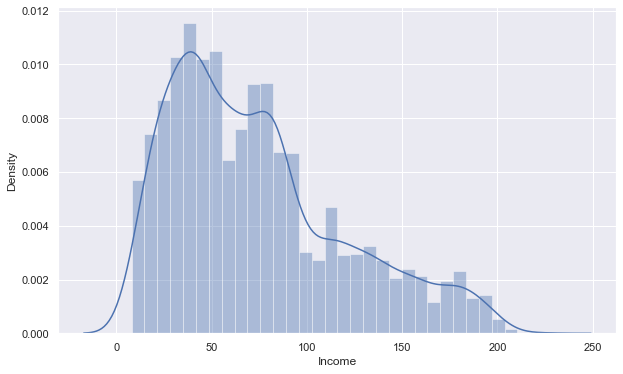

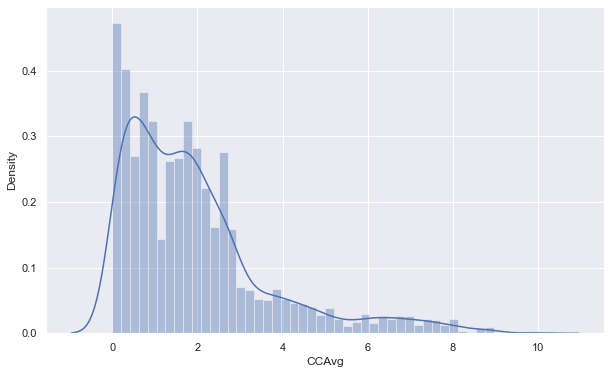

In [17]:
numericalColumns = ['Income','CCAvg']
for i in numericalColumns:
    plt.figure(figsize=(10,6))
    sns.distplot(loanData[i]);

### Insights 

1. Income of most of the people in this dataset range from 10-100.It is right skewed.
2. CCAvg for most of the people is between 0-3. It is right skewed. 

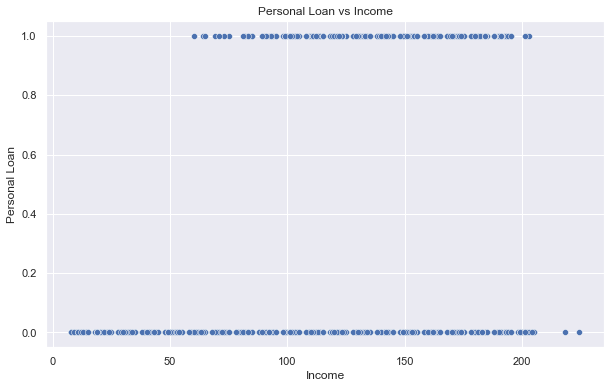

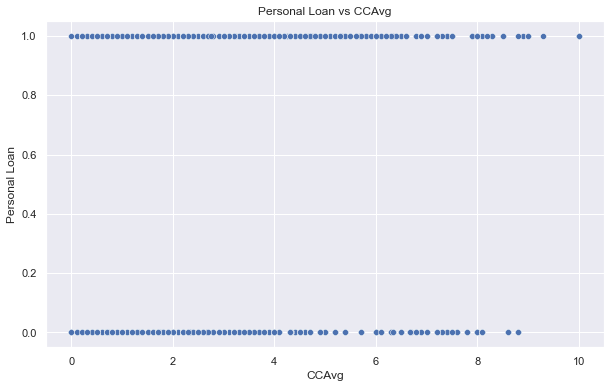

In [18]:
for i in numericalColumns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(loanData[i],loanData['Personal Loan']);
    plt.title('Personal Loan vs %s'% i)

In [19]:
loanData.groupby(["Personal Loan"]).median()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2518.5,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,2342.0,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [20]:
loanData.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


1. ID is unique for customers so don't have a relationship with Personal Loan.We can simply drop it.
2. ZIP Code also don't seems to be related to Personal Loan. We can drop this too.
3. Age doesn't seems to be related to Personal Loan.But we will keep and check its relevant after building model.
4. People who have taken loan tends to have more income.

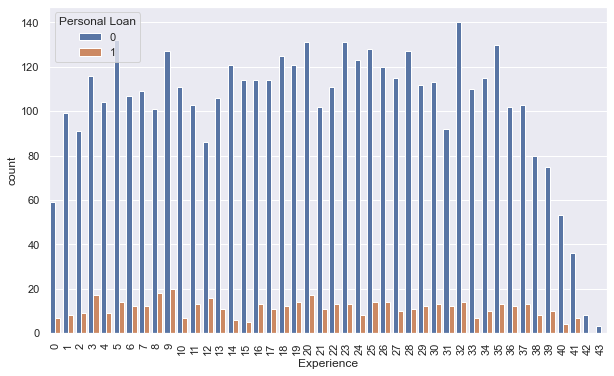

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(loanData['Experience'],hue=loanData['Personal Loan']);
plt.xticks(rotation=90);

Experience may be related to Personal loan.No clear relationship is observed here.So we will keep it and check it after building model.

In [22]:
pd.crosstab(loanData['Family'],loanData['Personal Loan'],normalize='columns')

Personal Loan,0,1
Family,,
1,0.301991,0.222917
2,0.263274,0.220833
3,0.194027,0.277083
4,0.240708,0.279167


There seems to be a relation between Family and personal loan.

In [23]:
pd.crosstab(loanData['Education'],loanData['Personal Loan'],normalize='columns')

Personal Loan,0,1
Education,,
1,0.443142,0.193750
2,0.270133,0.379167
3,0.286726,0.427083


There seems to be a relation between Education and Personal loan.

In [24]:
pd.crosstab(loanData['Securities Account'],loanData['Personal Loan'],normalize='columns')

Personal Loan,0,1
Securities Account,,
0,0.897788,0.875
1,0.102212,0.125


No prominient relationship is observed between Securities Account and Personal loan.

In [25]:
pd.crosstab(loanData['CD Account'],loanData['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.964159,0.708333
1,0.035841,0.291667


CD Account has a relation with Personal Loan.

In [26]:
pd.crosstab(loanData['Online'],loanData['Personal Loan'],normalize='columns')

Personal Loan,0,1
Online,,
0,0.404204,0.39375
1,0.595796,0.60625


Seems no relationship between Online and Personal Loan.

In [27]:
pd.crosstab(loanData['CreditCard'],loanData['Personal Loan'],normalize='columns')

Personal Loan,0,1
CreditCard,,
0,0.706416,0.702083
1,0.293584,0.297917


No relationship between CreditCard and Personal Loan is observed.

### Insights:
1. People with more income tend to take Personal Loan.
2. People who are purchasing more with credit card tends to take Loan(CCAvg).
3. Personal Loan doesn't depend on ZIP Code,ID.
4. Personal Loan doesn't seems to be related to Online,Creditcard,Securities Account.
4. Out of all the most prominient factor on which Loan depends on seems CCAvg,CD Account,income,family,education,Experience.

In [28]:
loanData['Personal Loan'].value_counts(normalize=True)*100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

### Insights
There are only 9.6% of people who has taken personal loan. This is an imbalanced dataset.The model build on this dataset will be good in predicting people who will not take loan(majority class).

### Prepare input data for model

In [29]:
modelData = loanData.copy()
modelData.drop(['ID','ZIP Code','Mortgage'],axis=1,inplace=True)
modelData.head()

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [30]:
modelData['Income'].nunique()

162

In [31]:
#Min income is 8 and max is 224
# Binning

bin_edges = [0, 50,100,150,200,250]         # edges to define intervals
bin_labels = ['0-50', '51-100', '101-150','151-200', '201-250']               # labels to denote each interval
modelData['Income'] = pd.cut(modelData['Income'], bins=bin_edges , labels=bin_labels)

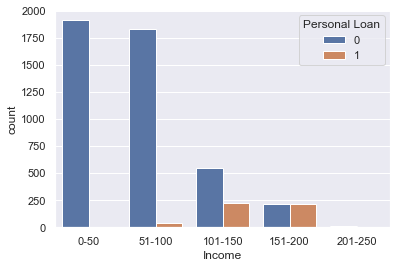

In [32]:
sns.countplot('Income',data=modelData,hue='Personal Loan');

In [33]:
modelData['Income'] = modelData['Income'].cat.codes
modelData['Income'].unique()

array([0, 1, 3, 2, 4], dtype=int8)

In [34]:
#Binning experience, min is 0 max is 43
bin_edges1 = [0, 10,20,30,40,50]         # edges to define intervals
bin_labels1 = ['0-10', '11-20', '21-30','31-40', '41-50']               # labels to denote each interval
modelData['Experience'] = pd.cut(modelData['Experience'], bins=bin_edges1 , labels=bin_labels1,include_lowest=True)
modelData['Experience'] = modelData['Experience'].cat.codes
modelData['Experience'].unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [35]:
#Binning age, min is 23 max is 67
bin_edges2 = [20, 30,40,50,60,70]         # edges to define intervals
bin_labels2 = ['20-30', '31-40', '41-50','51-60', '61-70']               # labels to denote each interval
modelData['Age'] = pd.cut(modelData['Age'], bins=bin_edges2 , labels=bin_labels2)
modelData['Age'] = modelData['Age'].cat.codes
modelData['Age'].unique()

array([0, 2, 1, 3, 4], dtype=int8)

In [36]:
#convert relevant columns into category type
modelData['Securities Account'] = modelData['Securities Account'].astype('category')
modelData['CD Account'] = modelData['CD Account'].astype('category')
modelData['Online'] = modelData['Online'].astype('category')
modelData['CreditCard'] = modelData['CreditCard'].astype('category')
modelData['Education'] = modelData['Education'].astype('category')
modelData['Family'] = modelData['Family'].astype('category')
modelData['Personal Loan'] = modelData['Personal Loan'].astype('category')

### Dependent, independent variables

In [37]:
X = modelData.drop(['Personal Loan'],axis=1)
y = modelData['Personal Loan']

In [38]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,0,0,0,1.6,0,0,1,0,0,1,0,0,0
1,2,1,0,1.5,0,1,0,0,0,1,0,0,0
2,1,1,0,1.0,0,0,0,0,0,0,0,0,0
3,1,0,1,2.7,0,0,0,1,0,0,0,0,0
4,1,0,0,1.0,0,0,1,1,0,0,0,0,1


### Split the data into training ,test set in the ratio 70:30

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

### Create Model

In [40]:
log_regression = LogisticRegression(random_state=7)
log_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = log_regression.predict(X_test)

In [42]:
df1 = pd.DataFrame(data=predictions) 
print('Predictions')
print(df1.value_counts())
print('Test set')
print(y_test.value_counts())

Predictions
0    1406
1      94
dtype: int64
Test set
0    1351
1     149
Name: Personal Loan, dtype: int64


### Precision,recall,f-1 score,accuracy,roc_auc_score

In [62]:
print("Precision: ", np.round(precision_score(y_test,predictions),2))
print("Recall: ",np.round(recall_score(y_test,predictions),2))
print("f1-score: ",np.round(f1_score(y_test,predictions),2))
print('The accuracy of this model is: ',np.round(accuracy_score(y_test,predictions),2))
print('roc_auc_score: ',np.round(roc_auc_score(y_test, predictions),2))

Precision:  0.91
Recall:  0.58
f1-score:  0.71
The accuracy of this model is:  0.95
roc_auc_score:  0.79


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.91      0.58      0.71       149

    accuracy                           0.95      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



### Heatmap for confusion matrix

Text(0.5, 12.5, 'Predicted label')

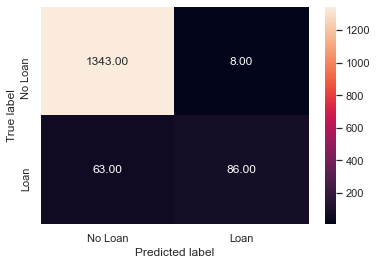

In [46]:
conf_mat = confusion_matrix(y_test,predictions)
confMatDf = pd.DataFrame(conf_mat,index=['No Loan','Loan'],columns=['No Loan','Loan'])
sns.heatmap(confMatDf,annot=True,fmt='.2f');
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Coefficients and intercept

In [47]:
intercept = log_regression.intercept_[0]
coeffs = log_regression.coef_[0]
coeff_data = pd.DataFrame()
coeff_data['Feature'] = X_train.columns
coeff_data['Coeffs'] = coeffs
coeff_data = coeff_data.append({'Feature': "Intercept",'Coeffs': intercept}, ignore_index = True)
coeff_data.sort_values('Coeffs',ascending=False)

,Feature,Coeffs
10,CD Account_1,3.085067
8,Education_3,3.074706
7,Education_2,2.918437
2,Income,2.363566
5,Family_3,1.733460
6,Family_4,1.123639
3,CCAvg,0.260935
0,Age,0.021503
1,Experience,-0.017640
4,Family_2,-0.109501


### Print all rows of test data where it is not equal to predictions

In [48]:
mergedDf = X_test.copy()
mergedDf['Original/Personal Loan'] = y_test
mergedDf['Predicted'] = predictions
mergedDf[mergedDf['Original/Personal Loan'] != mergedDf['Predicted']]

,Age,Experience,Income,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Original/Personal Loan,Predicted
932,3,2,2,1.8,0,1,0,1,0,1,1,1,1,0,1
3347,4,4,1,2.0,0,1,0,0,1,0,1,1,1,0,1
4377,1,0,2,2.7,0,0,0,0,1,0,0,1,0,1,0
3988,3,3,1,3.4,0,0,0,0,1,0,1,0,1,1,0
3271,3,2,1,4.1,0,0,1,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,3,2,2,4.2,0,0,0,1,0,0,0,1,0,1,0
464,2,1,1,3.6,0,0,1,0,1,0,0,0,1,1,0
1143,1,0,2,3.2,0,0,0,0,1,0,0,1,0,1,0
813,2,2,2,1.1,0,0,0,1,0,0,0,1,0,1,0


### Business Insights

1. Accuracy of the model is 95%. Out of total 1500 , 1429 predictions were right.

2. Precision of people with: 'No Loan' is 96%

   Precision of people with: 'Loan' is 91%
   
   This means the model predicts people who opt for 'No Loan' more precisely (96%) than the people who opt for 'Loan'.In this scenario, precision is important factor.We should try to increase precision(decrease False positive) so that bank don't end up  in giving loan to wrong people.
   

3. Recall and f1-score are also high for people who opt for 'No Loan' than for people who opt for loan.
   
   For people who opt for 'No Loan': Recall is 99 % , f1-score is 97%
   
   For people who opt for 'Loan': Recall is 58% ,f1-score is 71%
   
4. ROC AUC score is 79 %.


In [49]:
#let's check for false positive
mergedDf1 = mergedDf[mergedDf['Original/Personal Loan'] != mergedDf['Predicted']]
mergedDf1[mergedDf1['Predicted'] == 1]

,Age,Experience,Income,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Original/Personal Loan,Predicted
932,3,2,2,1.8,0,1,0,1,0,1,1,1,1,0,1
3347,4,4,1,2.0,0,1,0,0,1,0,1,1,1,0,1
1277,2,1,3,8.8,1,0,0,0,0,0,0,0,0,0,1
1565,1,0,2,1.2,0,1,0,0,1,0,0,1,0,0,1
3818,0,0,2,2.3,0,0,1,0,1,0,0,0,0,0,1
3312,2,2,3,8.8,1,0,0,0,0,0,0,0,0,0,1
4156,1,1,3,8.6,0,0,0,0,0,0,0,0,0,0,1
785,2,2,3,7.6,1,0,0,0,0,0,1,1,1,0,1


### Now let us try to drop the features which we thought are not much relevant and also they have negative coefficients(Online,CreditCard,Securities Account) and see if it helps in improving precision.

In [50]:
X1 = modelData.drop(['Personal Loan','Online','CreditCard','Securities Account'],axis=1)
y1 = modelData['Personal Loan']

In [51]:
X1 = pd.get_dummies(X1, drop_first=True)

In [52]:
X_trainNew,X_testNew,y_trainNew,y_testNew = train_test_split(X1,y1,test_size = 0.3,random_state=1)

In [53]:
lgModel = LogisticRegression(random_state=7)
lgModel.fit(X_trainNew,y_trainNew)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = lgModel.predict(X_testNew)

In [61]:
print("Precision: ", np.round(precision_score(y_testNew,y_pred),2))
print("Recall: ",np.round(recall_score(y_testNew,y_pred),2))
print("f1-score: ",np.round(f1_score(y_testNew,y_pred),2))
print('The accuracy of this model is: ',np.round(accuracy_score(y_testNew,y_pred),2))
print('roc_auc_score: ', np.round(roc_auc_score(y_testNew,y_pred),2) )
print('================================================')
print(classification_report(y_testNew,y_pred))

Precision:  0.93
Recall:  0.57
f1-score:  0.71
The accuracy of this model is:  0.95
roc_auc_score:  0.78
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.93      0.57      0.71       149

    accuracy                           0.95      1500
   macro avg       0.94      0.78      0.84      1500
weighted avg       0.95      0.95      0.95      1500



Text(0.5, 12.5, 'Predicted label')

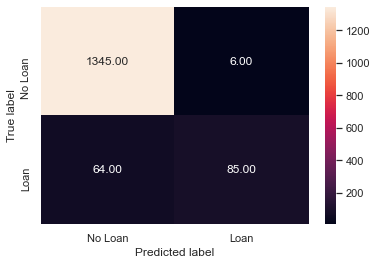

In [57]:
#Heatmap
conf_mat1 = confusion_matrix(y_testNew,y_pred)
confMatDf1 = pd.DataFrame(conf_mat1,index=['No Loan','Loan'],columns=['No Loan','Loan'])
sns.heatmap(confMatDf1,annot=True,fmt='.2f');
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [58]:
#Coefficients and intercept
intercept1 = lgModel.intercept_[0]
coeffs1 = lgModel.coef_[0]
coeff_data1 = pd.DataFrame()
coeff_data1['Feature'] = X_trainNew.columns
coeff_data1['Coeffs'] = coeffs1
coeff_data1 = coeff_data1.append({'Feature': "Intercept",'Coeffs': intercept1}, ignore_index = True)
coeff_data1.sort_values('Coeffs',ascending=False)

,Feature,Coeffs
8,Education_3,3.107809
7,Education_2,2.989011
2,Income,2.393612
9,CD Account_1,2.062659
5,Family_3,1.799367
6,Family_4,1.141484
3,CCAvg,0.258796
0,Age,0.058888
1,Experience,-0.053263
4,Family_2,-0.101582


In [59]:
mergedDf2 = X_testNew.copy()
mergedDf2['Original/Personal Loan'] = y_testNew
mergedDf2['Predicted'] = y_pred
mergedDf2[mergedDf2['Original/Personal Loan'] != mergedDf2['Predicted']]

,Age,Experience,Income,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,CD Account_1,Original/Personal Loan,Predicted
932,3,2,2,1.8,0,1,0,1,0,1,0,1
3347,4,4,1,2.0,0,1,0,0,1,1,0,1
4377,1,0,2,2.7,0,0,0,0,1,0,1,0
3988,3,3,1,3.4,0,0,0,0,1,1,1,0
3271,3,2,1,4.1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1,0,2,3.2,0,0,0,0,1,0,1,0
2625,4,3,2,3.4,0,0,1,1,0,0,0,1
813,2,2,2,1.1,0,0,0,1,0,0,1,0
421,0,0,2,3.1,0,0,1,1,0,0,1,0


### Business Insights

1. Accuracy of new model is 95%.
2. Precision is 93% which is good.
3. Recall is 57%.
4. f-score is 71%.
5. roc_auc_score is 78%
6. This is a good model with accuracy and precision as 95%.